# Predicting the likelihood of applying for a loan based on credit transactions

Market place: Request a loan from a customer
Product: Loan
Goal: Develop a model to predict the Quality of applicants
Points: Use risk scores & quality scores calculated based on those characteristics, not the characteristics of typical applicants
Models: Random Forest

1. Data Cleansing
-> One-Hot Endocing & Feature Scaling
2. EDA Process
3. Creating Model
-> Random Forest model
-> Grid Search 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import time

In [2]:
dataset = pd.read_csv('csv/financial-data.csv')

In [3]:
dataset

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,9949728,31,monthly,0,3245,0,5,3,2,6,...,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0
17904,9442442,46,bi-weekly,0,6525,0,2,1,3,3,...,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0
17905,9857590,46,weekly,0,2685,0,5,1,1,8,...,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0
17906,8708471,42,bi-weekly,0,2515,0,3,5,6,1,...,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

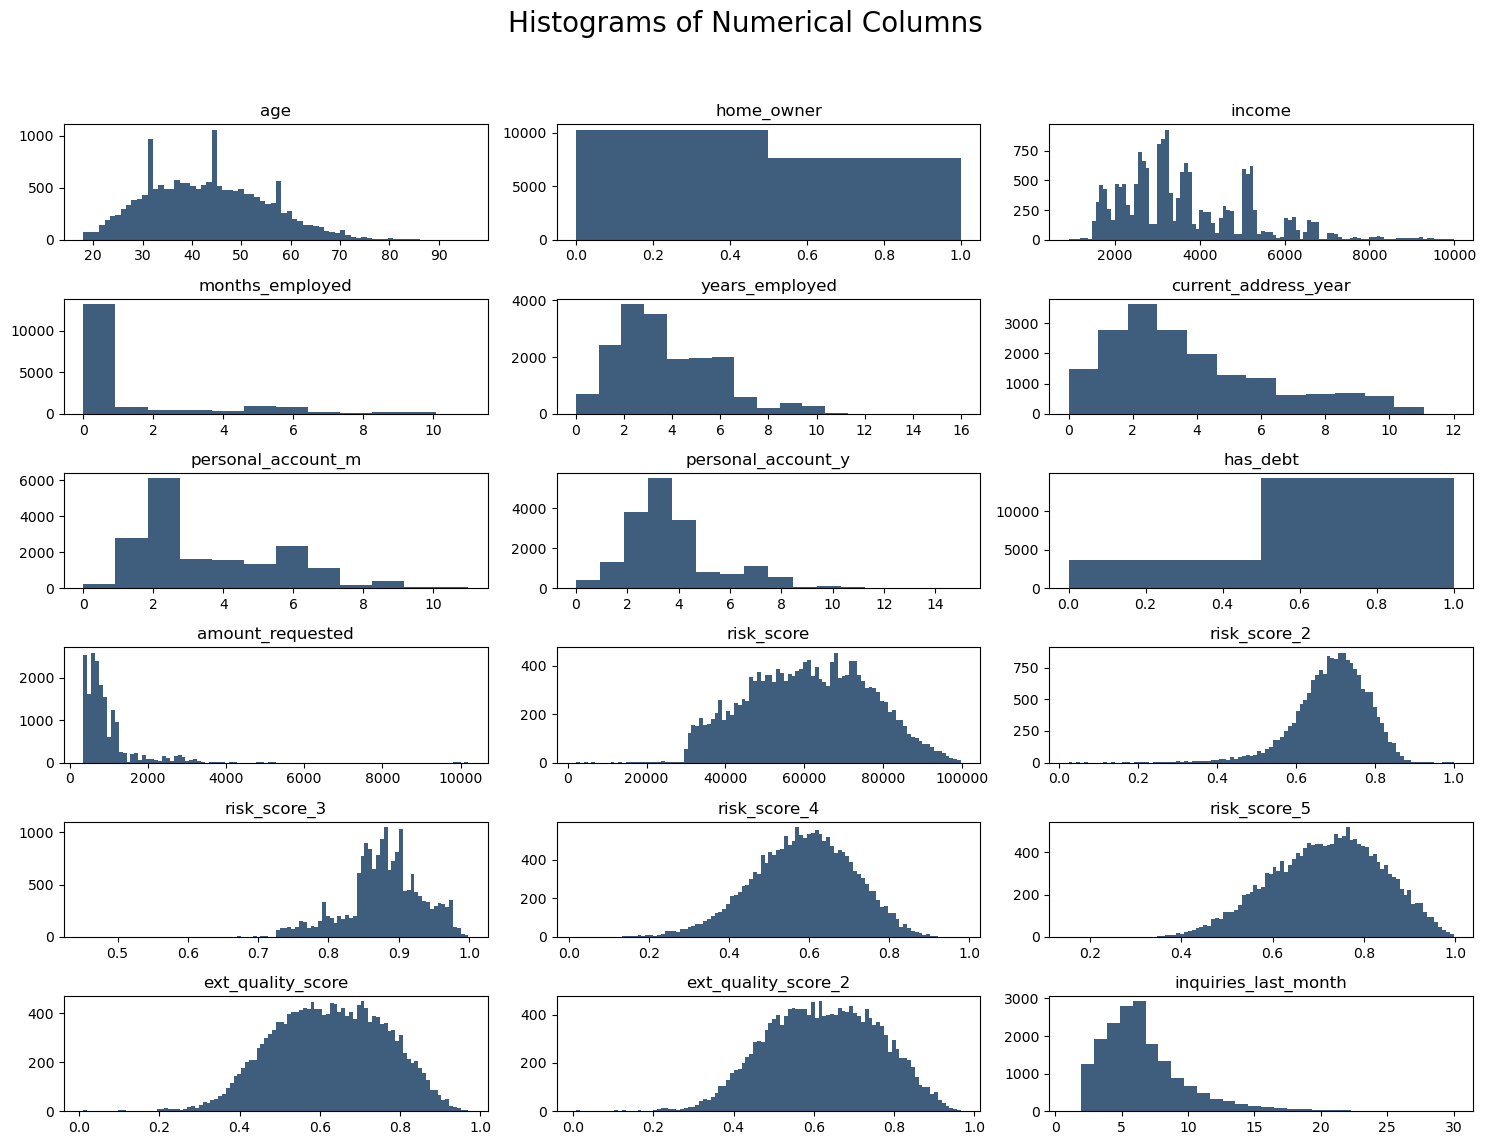

In [5]:
dataset2 = dataset.drop(columns = ['entry_id', 'pay_schedule', 'e_signed'])

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


<Axes: title={'center': 'Correlation with E Signed'}>

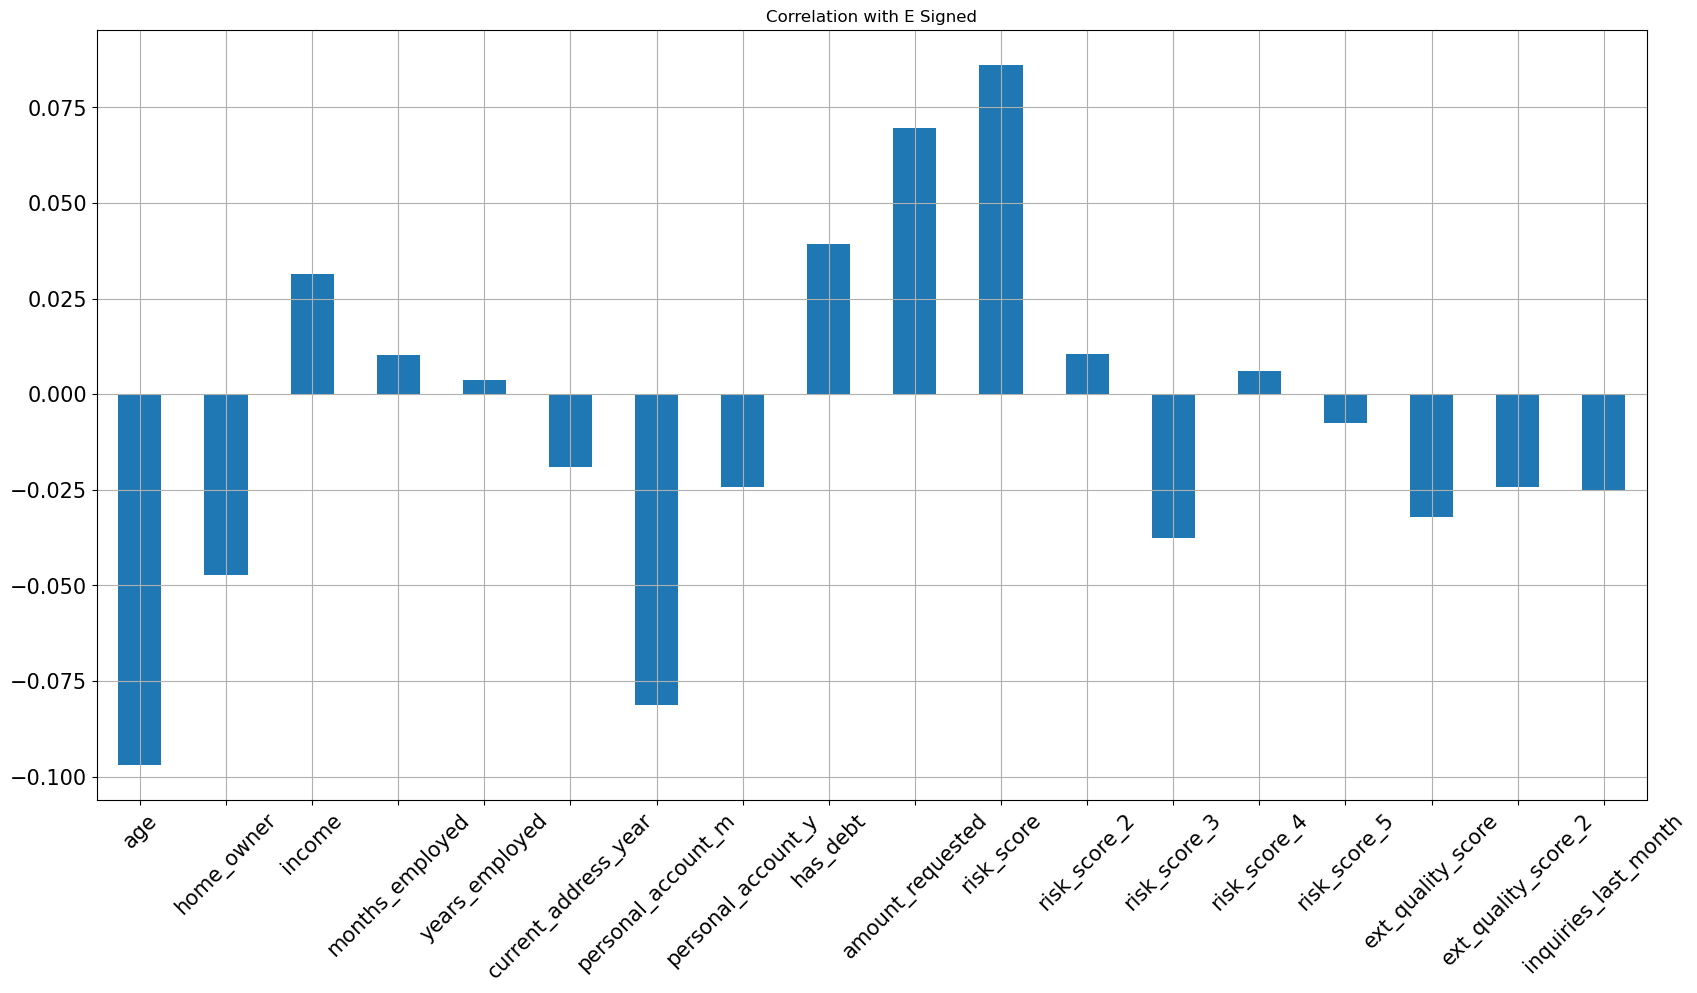

In [6]:
dataset2.corrwith(dataset.e_signed).plot.bar(
       figsize = (20, 10), title = "Correlation with E Signed", fontsize = 15,
        rot = 45, grid = True)


<Axes: >

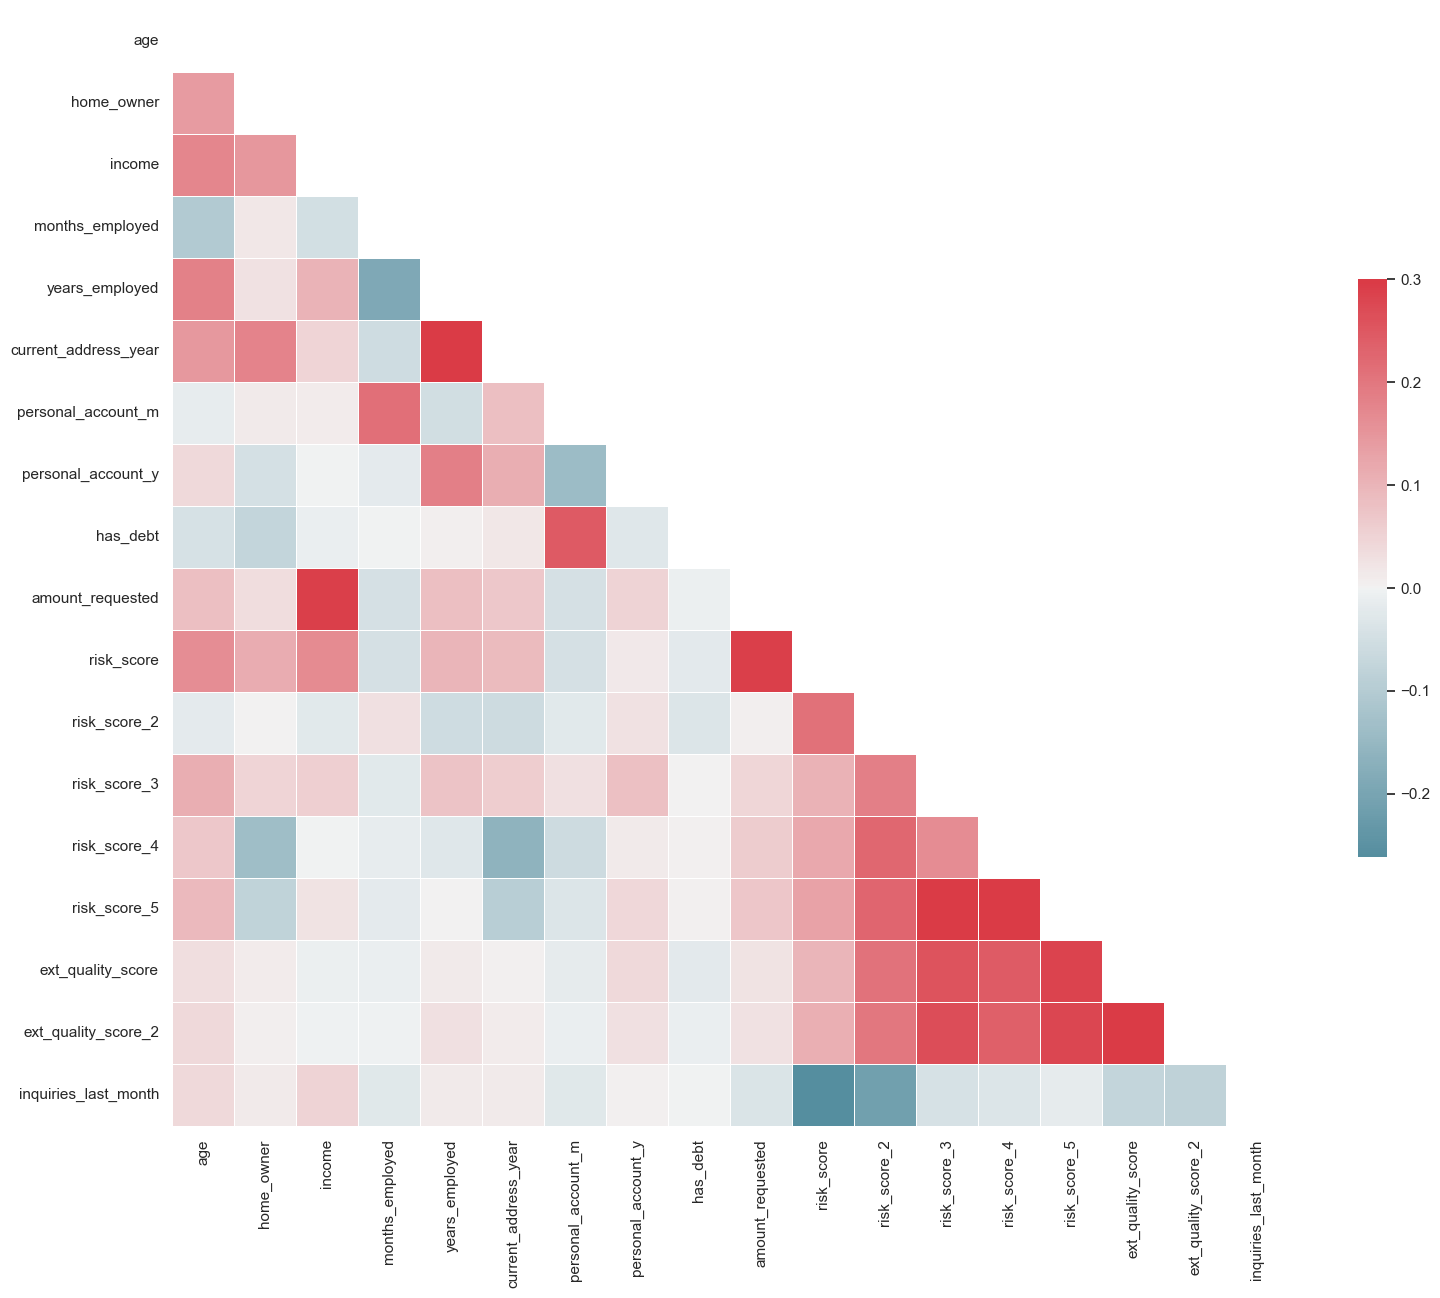

In [7]:
sns.set(style="white")
corr = dataset2.corr()
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
random.seed(100)

In [9]:
dataset

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,9949728,31,monthly,0,3245,0,5,3,2,6,...,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0
17904,9442442,46,bi-weekly,0,6525,0,2,1,3,3,...,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0
17905,9857590,46,weekly,0,2685,0,5,1,1,8,...,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0
17906,8708471,42,bi-weekly,0,2515,0,3,5,6,1,...,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1


In [10]:
dataset = dataset.drop(columns = ['months_employed'])

In [11]:
dataset['personal_account_months'] = (dataset.personal_account_m + (dataset.personal_account_y*12))

In [12]:
dataset['personal_account_months']

0        30
1        86
2        19
3        86
4        98
         ..
17903    74
17904    39
17905    97
17906    18
17907    16
Name: personal_account_months, Length: 17908, dtype: int64

In [13]:
dataset = dataset.drop(columns = ['personal_account_m','personal_account_y'])

In [14]:
dataset = pd.get_dummies(dataset)

In [15]:
dataset.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [16]:
dataset = dataset.drop(columns = ['pay_schedule_semi-monthly'])

In [17]:
dataset

,entry_id,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_weekly
0,7629673,40,1,3135,3,3,1,550,36200,0.737398,...,0.487712,0.515977,0.580918,0.380918,10,1,30,1,0,0
1,3560428,61,0,3180,6,3,1,600,30150,0.738510,...,0.713423,0.826402,0.730720,0.630720,9,0,86,0,0,1
2,6934997,23,0,1540,0,0,1,450,34550,0.642993,...,0.595018,0.762284,0.531712,0.531712,7,0,19,0,0,1
3,5682812,40,0,5230,6,1,1,700,42150,0.665224,...,0.767828,0.778831,0.792552,0.592552,8,1,86,1,0,0
4,5335819,33,0,3590,5,2,1,1100,53850,0.617361,...,0.613487,0.665523,0.744634,0.744634,12,0,98,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,9949728,31,0,3245,5,3,1,700,71700,0.691126,...,0.664112,0.838012,0.727705,0.627705,2,0,74,0,1,0
17904,9442442,46,0,6525,2,1,1,800,51800,0.648525,...,0.699241,0.844724,0.774918,0.474918,3,0,39,1,0,0
17905,9857590,46,0,2685,5,1,1,1200,59650,0.677975,...,0.687981,0.939101,0.472045,0.672045,9,0,97,0,0,1
17906,8708471,42,0,2515,3,5,1,400,80200,0.642741,...,0.456448,0.686823,0.406568,0.406568,3,1,18,1,0,0


In [18]:
response = dataset.e_signed
users = dataset.entry_id

In [19]:
dataset = dataset.drop(columns = ['e_signed','entry_id'])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,
                                                    response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100, criterion = 'entropy')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 918,  736],
       [ 619, 1309]])

In [24]:
# K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y = y_train,cv = 10)

In [28]:
accuracies.mean()
print("Random Forest Classifier Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

array([0.62805304, 0.6406141 , 0.60572226, 0.62386602, 0.61758548,
       0.63433357, 0.65502793, 0.63407821, 0.63198324, 0.63058659])

In [ ]:
# Grid Search to find the perfect parameters

from sklearn.model_selection import GridSearchCV
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

final_results = pd.concat([y_test, users], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results = final_results[['entry_id', 'e_signed', 'predictions']]

In [ ]:
final_results

In [ ]:
confusion_matrix(y_test, final_results['predictions'])

In [ ]:
print(classification_report(y_test, final_results['predictions']))